In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 100)
import missingno as msno
%matplotlib inline

In [3]:
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

~$DataDictionary.xlsx
DataDictionary.xlsx
dataset.txt
game.rar
sample_submission.csv
test.csv
train.csv



In [2]:
# 因为你的输入数据列有混合类型，而PANDAS默认要找到可以使所占用空间最小的类型来储存你的数据。
# low_memory设置为false之后，pandas就不进行寻找，直接采用较大的数据类型来储存。
# train_df = pd.read_csv("../input/train.csv", parse_dates=["transactiondate"])
train_df = pd.read_csv("../input/train.csv")
test_df = pd.read_csv("../input/test.csv")

# train_data=pd.read_csv("../input/train.csv",low_memory=False)

D:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
print ("Shape Of Train: ",train_df.shape)
print ("Shape Of Test: ",test_df.shape)

Shape Of Train:  (709903, 64)
Shape Of Test:  (177476, 63)


In [3]:
print (train_df[['loan_status', 'acc_now_delinq']].groupby(['loan_status'], as_index=False).mean())

                                         loan_status  acc_now_delinq
0                                        Charged Off        0.003594
1                                            Current        0.005274
2                                            Default        0.005219
3  Does not meet the credit policy. Status:Charge...        0.000000
4  Does not meet the credit policy. Status:Fully ...        0.001873
5                                         Fully Paid        0.002783
6                                    In Grace Period        0.004953
7                                             Issued        0.004748
8                                  Late (16-30 days)        0.008990
9                                 Late (31-120 days)        0.008609


In [5]:
pd.value_counts(train_df.loan_status).to_frame()

,loan_status
Current,481256
Fully Paid,166352
Charged Off,36168
Late (31-120 days),9293
Issued,6739
In Grace Period,5047
Late (16-30 days),1891
Does not meet the credit policy. Status:Fully Paid,1602
Default,958
Does not meet the credit policy. Status:Charged Off,597


In [6]:
train_df.head(6).transpose()

,0,1,2,3,4,5
member_id,13599771,1491956,64687987,8446850,58471388,5337525
loan_amnt,8875,12500,33600,17000,14000,24000
funded_amnt,8875,12500,33600,17000,14000,24000
funded_amnt_inv,8875,12475,33600,17000,14000,24000
term,36 months,36 months,60 months,60 months,60 months,60 months
int_rate,18.25,8.9,18.55,9.71,16.99,17.27
installment,321.97,396.92,863.31,358.78,347.87,599.96
grade,D,A,E,B,D,C
sub_grade,D3,A5,E2,B1,D3,C5
emp_title,Inventory/Part time Sup,Bel Brands USA,Assistant Principal,Cook Childrens Medical Center,Cook,walmart distribution cntr


In [32]:
print ("Shape Of Positive Train: ",train_df[train_df['acc_now_delinq']==1].shape)
print ("Shape Of Negetive Train: ",train_df[train_df['acc_now_delinq']==0].shape)

Shape Of Positive Train:  (3293, 64)
Shape Of Negetive Train:  (706610, 64)


In [33]:
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / train_df.shape[0]
missing_df.loc[missing_df['missing_ratio']>0.999]

,column_name,missing_count,missing_ratio
43,annual_inc_joint,709493,0.999422
44,dti_joint,709495,0.999425
45,verification_status_joint,709493,0.999422


In [42]:
dataTypeDf = pd.DataFrame(train_df.dtypes.value_counts()).reset_index().rename(columns={"index":"variableType",0:"count"})
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sn.barplot(data=dataTypeDf,x="variableType",y="count",ax=ax,color="#34495e")
ax.set(xlabel='Variable Type', ylabel='Count',title="Variables Count Across Datatype")

[Text(0,0.5,'Count'),
 Text(0.5,0,'Variable Type'),
 Text(0.5,1,'Variables Count Across Datatype')]

In [48]:
missingValueColumns = train_df.columns[train_df.isnull().any()].tolist()
msno.bar(train_df[missingValueColumns],\
            figsize=(20,8),color="#34495e",fontsize=12,labels=True,)

How many arrears

0    706610
1      3293
Name: acc_now_delinq, dtype: int64


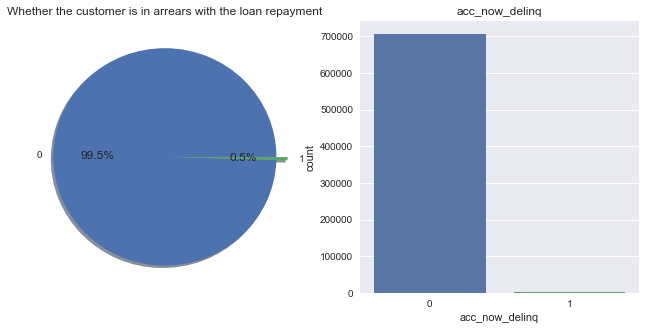

In [23]:
s = train_df['acc_now_delinq'].value_counts().head(10)
print (s)
f,ax=plt.subplots(1,2,figsize=(11,5))
train_df['acc_now_delinq'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Whether the customer is in arrears with the loan repayment')
ax[0].set_ylabel('')
sns.countplot('acc_now_delinq',data=train_df,ax=ax[1])
ax[1].set_title('acc_now_delinq')
plt.show()

In [78]:
print (train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709903 entries, 0 to 709902
Data columns (total 64 columns):
member_id                      709903 non-null int64
loan_amnt                      709903 non-null float64
funded_amnt                    709903 non-null float64
funded_amnt_inv                709903 non-null float64
term                           709903 non-null int64
int_rate                       709903 non-null float64
installment                    709903 non-null float64
grade                          709903 non-null object
sub_grade                      709903 non-null object
emp_title                      668721 non-null object
emp_length                     709903 non-null float64
home_ownership                 709903 non-null object
annual_inc                     709899 non-null float64
verification_status            709903 non-null int64
issue_d                        709903 non-null datetime64[ns]
loan_status                    709903 non-null object
pymnt_plan   

In [4]:
print (train_df[['grade', 'acc_now_delinq']].groupby(['grade'], as_index=False).mean())

  grade  acc_now_delinq
0     A        0.000943
1     B        0.003820
2     C        0.005584
3     D        0.006386
4     E        0.007284
5     F        0.007180
6     G        0.011502


In [33]:
print(train_df.isnull().sum())
print("-"*10)
print(test_df.isnull().sum())

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       41182
emp_length                          0
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
desc                           608928
purpose                             0
title                             127
zip_code                            0
addr_state                          0
dti                                 0
earliest_cr_line                   24
mths_since_last_record         600348
pub_rec                            24
revol_bal   

In [ ]:
# XGboost is good at dealing with numbers but definitely not good when dealing with string. 
# So the solution is neither we drop them or transform them.
drop_elements = ['emp_title', 'desc', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'FamilySize']
df_train = df_train.drop(drop_elements,axis=1)

Data Cleaning
great! now let's clean our data and map our features into numerical values.

In [34]:
full_data = [train_df, test_df]

In [ ]:
for dataset in full_data:
    #code categorical data
    dataset[]
    

In [53]:
# Mapping emp_length
emp_length_mapping = {'< 1 year': 1, '1 year': 2, '2 years': 3, '3 years': 4, '4 years': 5, '5 years': 6, '6 years': 7, '7 years': 8, '8 years': 9, '9 years': 10, '10 years': 11, '10+ years': 12}
train_df['emp_length'] = train_df['emp_length'].map(emp_length_mapping)
train_df['emp_length'] = train_df['emp_length'].fillna(0)

In [51]:
# Mapping term
import re
train_df['term']=train_df['term'].apply(lambda row:int(re.findall(r"\d+\.?\d*",row)[0]))

In [ ]:
# Mapping Category feature
from sklearn.preprocessing import LabelEncoder
category_feature=['grade','sub_grade','home_ownership','verification_status','pymnt_plan','loan_status','purpose']
train_df[category_feature]=train_df[category_feature].apply(LabelEncoder().fit_transform)

In [58]:
# Mapping Category feature
from sklearn.preprocessing import LabelEncoder
train_df[['verification_status']]=train_df[['verification_status']].apply(LabelEncoder().fit_transform)

In [76]:
#Handle datetime，将Feb-1985转换成1985-02-01
train_df['earliest_cr_line'] =  pd.to_datetime(train_df['earliest_cr_line'], format='%b-%Y')
train_df['issue_d'] = pd.to_datetime(train_df['issue_d'], format='%b-%Y')

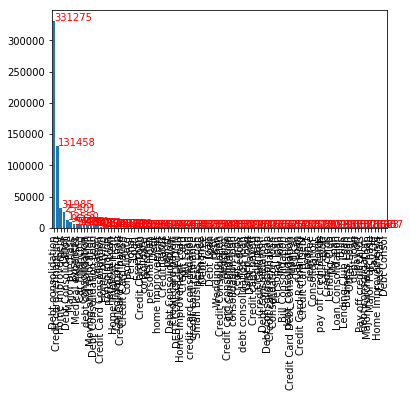

In [94]:
s = train_df['title'].value_counts().head(100)
ax=s.plot.bar(width=.8) 

for i, v in s.reset_index().iterrows():
    ax.text(i, v.title + 0.2 , v.title, color='red')

In [86]:
train_df.loc[train_df['pymnt_plan']!='n'].transpose()

,114188,135452,235929,256785,285105,441997,571162
member_id,15619764,689492,1655442,12667456,786204,3420529,748208
loan_amnt,24000,5000,25975,30000,15000,25000,25000
funded_amnt,24000,5000,25975,30000,15000,25000,25000
funded_amnt_inv,24000,4904.55,25950,30000,14750,24950,23725
term,36 months,36 months,60 months,36 months,60 months,36 months,60 months
int_rate,17.57,13.61,23.76,14.47,9.62,15.8,15.21
installment,862.49,169.95,743.64,1032.2,315.91,876.46,597.51
grade,D,C,F,C,B,C,D
sub_grade,D4,C2,F4,C2,B3,C3,D2
emp_title,attorney,Global Commerce Solutions,honda manf.,FITNESS SPECIALIST,Cengage Learning,Dept of Defense,emory adventist


In [92]:
train_df['title']

0                       Debt consolidation
1                                 LC DbtL1
2                       Debt consolidation
3                            Consolidation
4                       Debt consolidation
5                       Debt Consolidation
6                  Credit card refinancing
7                       Debt consolidation
8                  Credit card refinancing
9                       Debt consolidation
10                      Debt consolidation
11                          Major purchase
12                 Credit card refinancing
13                 Credit card refinancing
14                 Credit card refinancing
15                      Debt consolidation
16                 Credit card refinancing
17                     credit card pay off
18                      Debt consolidation
19                 Credit card refinancing
20                      Debt consolidation
21                           Clean up Debt
22                      Debt consolidation
23         

ValueError: could not convert string to float: 'Not Verified'

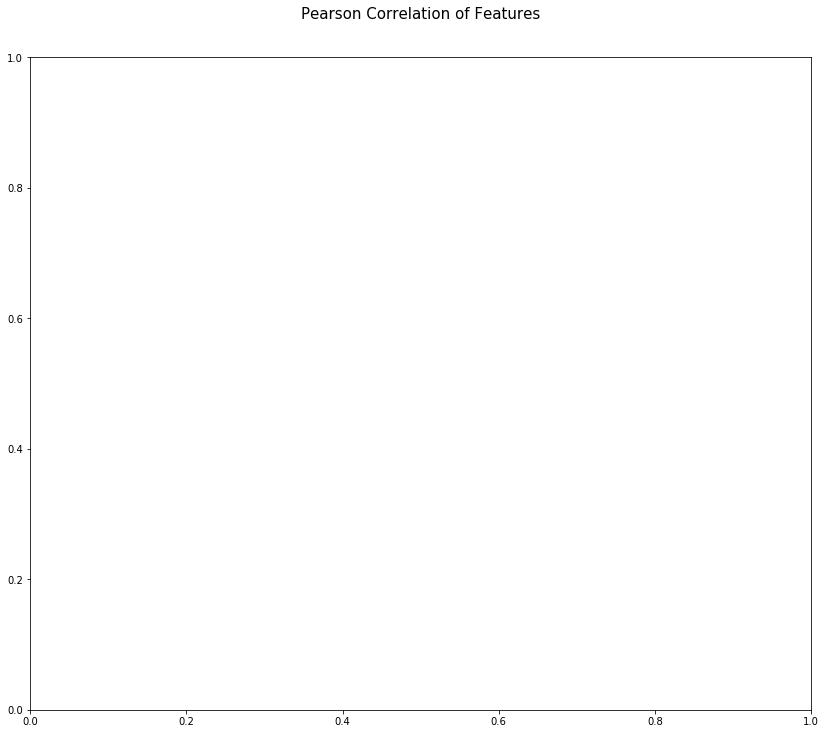

In [4]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)